# Adaboosting

In [7]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')

#欠損値を削除 今回はバギングを試したいだけなのでただ欠損値を落とす
df.dropna(inplace=True)

# X, yを作成
y_col = ['survived','alive']
X = df.drop(columns=y_col)
y = df['survived']

#決定木では、ワンホットエンコーディングではなく、ラベルエンコーディングでもあまり問題ではない
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas') #←これを使うとDataFrameの形で返してくれる
X = oe.fit_transform(X) #　このままではnumpyの形で返ってくる

#hold out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
print(f'adaboost AUC : {roc_auc_score(y_test, y_pred_ada[:, 1])}')

adaboost AUC : 0.9375


<BarContainer object of 13 artists>

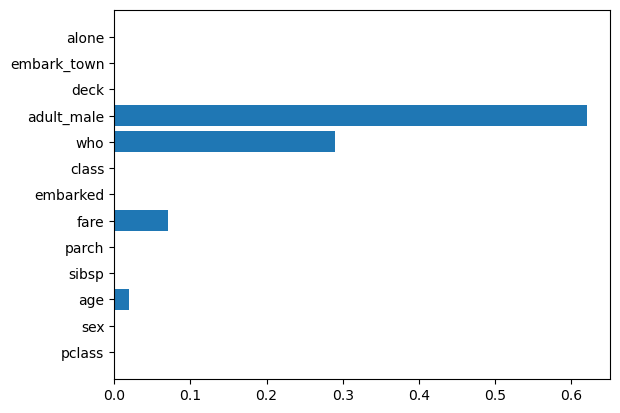

In [8]:
import matplotlib.pyplot as plt
plt.barh(X.columns, ada.feature_importances_)

# Challenge  勾配ブースティング回帰を実装する

In [33]:
from sklearn.tree import DecisionTreeRegressor
class MyGradientBoostingRegressor:
    
    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
    
    def fit(self, X, y):
        self.F0 = y.mean()
        Fb = self.F0
        for _ in range(self.n_estimators):
             #残差を計算
            r = y - Fb
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            Fb += self.learning_rate * weight
            self.estimators.append(estimator) 
            
    def predict(self, X):
        Fb = self.F0
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
        return Fb

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

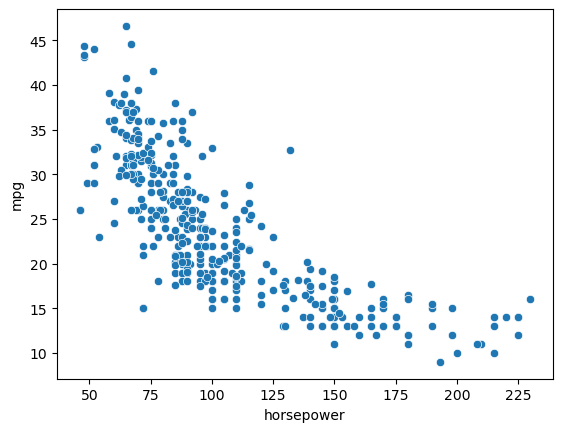

In [34]:
import seaborn as sns
#でーた準備
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [43]:
mgbr = MyGradientBoostingRegressor()
mgbr.fit(X, y)
mgbr.predict(X)

array([17.95434839, 15.74535562, 15.74535562, 15.74535562, 16.96376992,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 23.01512881,
       23.01512881, 22.21547999, 24.54754893, 24.54754893, 31.96655862,
       24.54754893, 24.54754893, 23.01512881, 20.76151767, 24.54754893,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 24.54754893,
       24.54754893, 23.01512881, 20.76151767, 20.76151767, 20.76151767,
       24.54754893, 20.76151767, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 20.76151767,
       27.71424635, 20.76151767, 24.54754893, 24.54754893, 24.54754893,
       31.61939691, 27.71424635, 31.96655862, 31.61939691, 31.96655862,
       31.61939691, 23.01512881, 27.71424635, 31.96655862, 24.54754893,
       24.54754893, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74

# sklearnの勾配ブースティング回帰を使ってみる

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.03, max_depth=1, random_state=0).fit(X, y)
gbr.predict(X)

array([17.95434839, 15.74535562, 15.74535562, 15.74535562, 16.96376992,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 23.01512881,
       23.01512881, 22.21547999, 24.54754893, 24.54754893, 31.96655862,
       24.54754893, 24.54754893, 23.01512881, 20.76151767, 24.54754893,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 24.54754893,
       24.54754893, 23.01512881, 20.76151767, 20.76151767, 20.76151767,
       24.54754893, 20.76151767, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 20.76151767,
       27.71424635, 20.76151767, 24.54754893, 24.54754893, 24.54754893,
       31.61939691, 27.71424635, 31.96655862, 31.61939691, 31.96655862,
       31.61939691, 23.01512881, 27.71424635, 31.96655862, 24.54754893,
       24.54754893, 15.74535562, 15.74535562, 15.74535562, 15.74535562,
       15.74535562, 15.74535562, 15.74535562, 15.74535562, 15.74

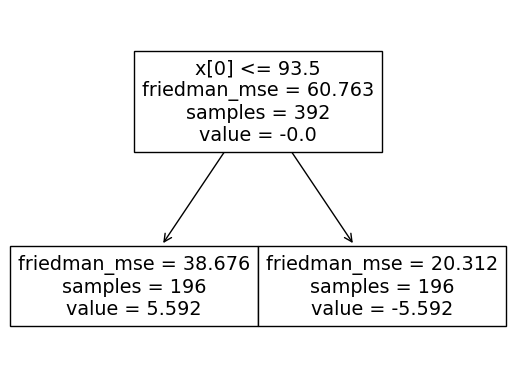

In [45]:
#各モデルの詳細の見方
from sklearn.tree import plot_tree
#最初のモデルを取り出す
model = gbr.estimators_[0][0]
_ = plot_tree(model)

# scratch 勾配ブースティング（分類ver）

In [59]:
import numpy as np
class MyGradientBoostingRegressor:
    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
        
    def fit(self, X, y):
        self.F0 = np.log(y.mean()/(1-y.mean()))
        F0 = np.full(len(y), self.F0)
        Fb = F0
        for _ in range(self.n_estimators):
            p = 1 / (1 + np.exp(-Fb))
            r = y - p
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)   
            X_leafs = estimator.apply(X)
            leaf_ids = np.unique(X_leafs)
            for leaf_id in leaf_ids:
                fltr = X_leafs ==leaf_id
                num = r[fltr].sum()
                den = (p[fltr] * (1-p[fltr])).sum()
                estimator_pred_proba = num / den
                estimator.tree_.value[leaf_id, 0, 0] = estimator_pred_proba
                Fb[fltr] += self.learning_rate * estimator_pred_proba
            self.estimators.append(estimator)
                
    def predict_proba(self, X):
        Fb = np.full(X.shape[0], self.F0)
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
        return 1 / (1 + np.exp(-Fb))

In [60]:
my_gbc = MyGradientBoostingRegressor(n_estimators=100, max_depth=1)
my_gbc.fit(X_train, y_train)
my_gbc.predict_proba(X_test)

array([0.5514342 , 0.4329777 , 0.80125347, 0.80125347, 0.5514342 ,
       0.25797762, 0.5514342 , 0.83715418, 0.88099514, 0.88099514,
       0.5514342 , 0.82137752, 0.82137752, 0.88099514, 0.5514342 ,
       0.5514342 , 0.5514342 , 0.82137752, 0.88099514, 0.40100637,
       0.88099514, 0.78760146, 0.88099514, 0.88099514, 0.80125347,
       0.5514342 , 0.40100637, 0.80125347, 0.4329777 , 0.4329777 ,
       0.4329777 , 0.88099514, 0.88099514, 0.88099514, 0.82137752,
       0.88099514, 0.82137752, 0.88099514, 0.40100637, 0.5514342 ,
       0.4329777 , 0.82137752, 0.5514342 , 0.78760146, 0.40100637,
       0.88099514, 0.88099514, 0.5514342 , 0.5514342 , 0.5514342 ,
       0.5514342 , 0.82137752, 0.5514342 , 0.88099514, 0.88099514])

# sklearnの勾配ブースティング分類

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
gbc.predict_proba(X_test)[:, 1]
print(f'grad boost AUC: {roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])}')

grad boost AUC: 0.9407051282051282
